In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Customer data/BankCustomerData.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Customer
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,student,single,secondary,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,retired,married,primary,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,blue-collar,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,student,single,secondary,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        42639 non-null  int64 
 1   job        42639 non-null  object
 2   marital    42639 non-null  object
 3   education  42639 non-null  object
 4   default    42639 non-null  object
 5   balance    42639 non-null  int64 
 6   housing    42639 non-null  object
 7   loan       42639 non-null  object
 8   contact    42639 non-null  object
 9   day        42639 non-null  int64 
 10  month      42639 non-null  object
 11  duration   42639 non-null  int64 
 12  campaign   42639 non-null  int64 
 13  pdays      42639 non-null  int64 
 14  previous   42639 non-null  int64 
 15  poutcome   42639 non-null  object
 16  Customer   42639 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.5+ MB


In [ ]:
data.shape

(42639, 17)

In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Customer     0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
df = data.copy()

Text(0.5, 1.0, 'Education type vs Count')

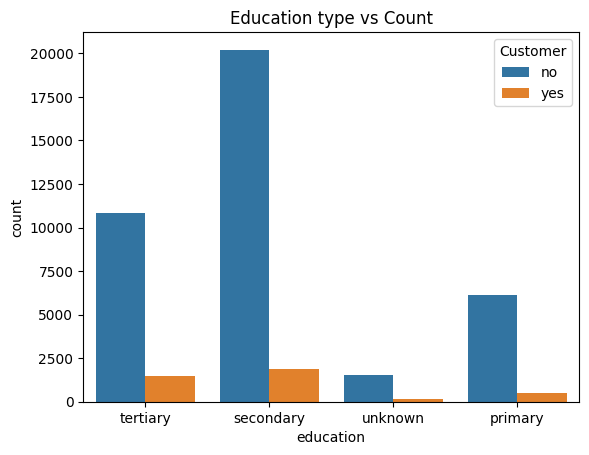

In [ ]:
sns.countplot(x="education",data=df, hue = "Customer")
plt.title("Education type vs Count")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'admin.'),
  Text(7, 0, 'services'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'housemaid'),
  Text(11, 0, 'student')])

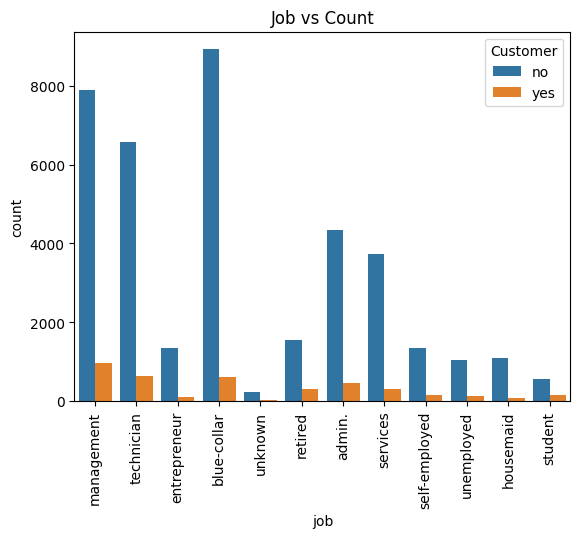

In [ ]:
sns.countplot(x="job", data = df, hue ="Customer")
plt.title("Job vs Count")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Martial Status vs Count')

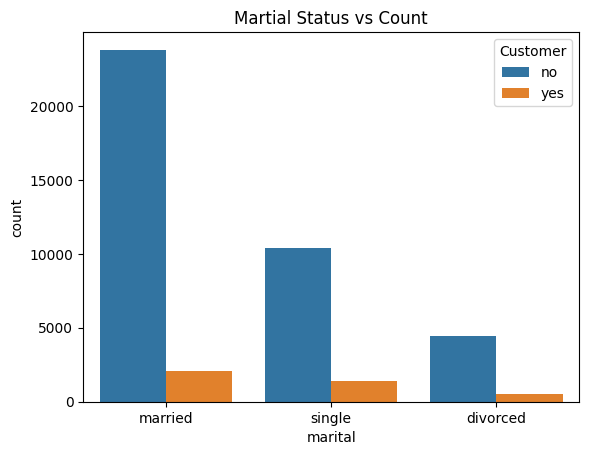

In [ ]:
sns.countplot(x="marital", data = df,hue ="Customer")
plt.title("Martial Status vs Count")

Text(0.5, 1.0, 'personal loan vs Count')

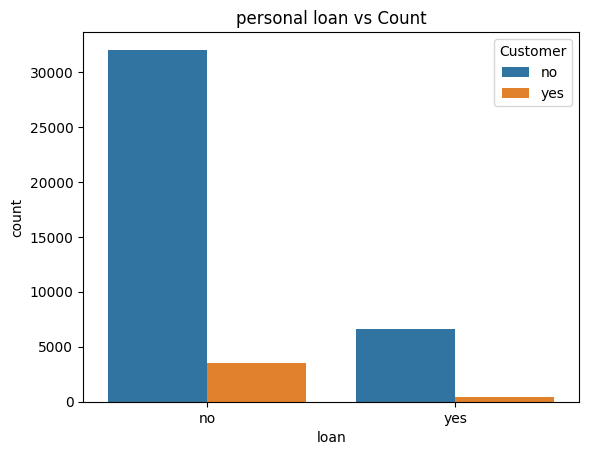

In [ ]:
sns.countplot(x="loan", data = df, hue ="Customer")
plt.title("personal loan vs Count")

<Axes: >

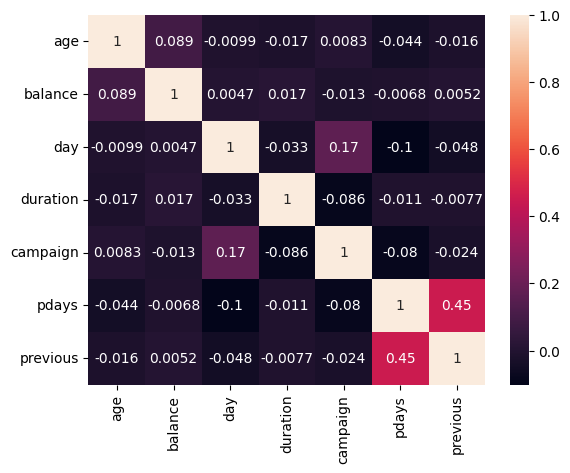

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot =True)

In [ ]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.088716,-0.009869,-0.016529,0.008296,-0.044165,-0.016279
balance,0.088716,1.000000,0.004696,0.016721,-0.013358,-0.006797,0.005194
day,-0.009869,0.004696,1.000000,-0.032557,0.165906,-0.101391,-0.048445
duration,-0.016529,0.016721,-0.032557,1.000000,-0.085640,-0.010812,-0.007730
campaign,0.008296,-0.013358,0.165906,-0.085640,1.000000,-0.079981,-0.024374
pdays,-0.044165,-0.006797,-0.101391,-0.010812,-0.079981,1.000000,0.450869
previous,-0.016279,0.005194,-0.048445,-0.007730,-0.024374,0.450869,1.000000


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Customer
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df = pd.get_dummies(df,columns = ['job','marital','education','default','housing','month','loan','contact','poutcome'], drop_first = True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,Customer,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1
2,33,2,5,76,1,-1,0,no,0,1,...,1,0,0,0,1,0,1,0,0,1
3,47,1506,5,92,1,-1,0,no,1,0,...,1,0,0,0,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1


In [ ]:
df['Customer'].replace('yes', 1, inplace=True)
df['Customer'].replace('no', 0, inplace=True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,Customer,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,1,0,1,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [ ]:
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))
upper_tri

<ipython-input-17-41d6514d9479>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))


,age,balance,day,duration,campaign,pdays,previous
age,NaN,0.088716,-0.009869,-0.016529,0.008296,-0.044165,-0.016279
balance,NaN,NaN,0.004696,0.016721,-0.013358,-0.006797,0.005194
day,NaN,NaN,NaN,-0.032557,0.165906,-0.101391,-0.048445
duration,NaN,NaN,NaN,NaN,-0.085640,-0.010812,-0.007730
campaign,NaN,NaN,NaN,NaN,NaN,-0.079981,-0.024374
pdays,NaN,NaN,NaN,NaN,NaN,NaN,0.450869
previous,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#drop both highly correlated columns
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7) or any(upper_tri[column] < 0.01)]
to_drop

['day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
#specify features and target columns
target = data['Customer']
features = data.drop(to_drop, axis=1)
features = features.drop('Customer',axis=1)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        42639 non-null  int64 
 1   job        42639 non-null  object
 2   marital    42639 non-null  object
 3   education  42639 non-null  object
 4   default    42639 non-null  object
 5   balance    42639 non-null  int64 
 6   housing    42639 non-null  object
 7   loan       42639 non-null  object
 8   contact    42639 non-null  object
 9   month      42639 non-null  object
 10  poutcome   42639 non-null  object
dtypes: int64(2), object(9)
memory usage: 3.6+ MB


In [ ]:
#Data Scaling
from sklearn.preprocessing import MinMaxScaler
columns = df.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=[columns])
df.head()

,age,balance,day,duration,campaign,pdays,previous,Customer,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df,target,stratify=target, test_size=0.2)

In [ ]:
X_train.shape

(34111, 43)

In [ ]:
X_test.shape

(8528, 43)

In [ ]:
X_train_2d=np.expand_dims(X_train,axis=2)
X_train_2d

array([[[0.36363636],
        [0.07280337],
        [0.8       ],
        ...,
        [0.        ],
        [0.        ],
        [1.        ]],

       [[0.2987013 ],
        [0.08265393],
        [0.2       ],
        ...,
        [0.        ],
        [0.        ],
        [1.        ]],

       [[0.19480519],
        [0.07058813],
        [0.03333333],
        ...,
        [0.        ],
        [0.        ],
        [1.        ]],

       ...,

       [[0.1038961 ],
        [0.07347521],
        [0.5       ],
        ...,
        [0.        ],
        [0.        ],
        [1.        ]],

       [[0.14285714],
        [0.07627149],
        [0.86666667],
        ...,
        [1.        ],
        [0.        ],
        [0.        ]],

       [[0.2987013 ],
        [0.09899588],
        [0.6       ],
        ...,
        [0.        ],
        [0.        ],
        [1.        ]]])

In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit_transform(df.drop('Customer',axis=1))
pca

<ipython-input-27-27aa554526d2>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  pca = pca.fit_transform(df.drop('Customer',axis=1))


array([[ 0.2412807 ,  0.2256563 ],
       [-0.87732055,  1.22245559],
       [-1.07571243, -0.08042704],
       ...,
       [ 0.14644691, -0.66062401],
       [ 0.13053955,  0.56511047],
       [ 1.41437393,  0.79572889]])

In [ ]:
ndf = pd.DataFrame(pca, columns=['C1',
'C2'])
ndf.insert(2, "Target", df['Customer'], True)
ndf

,C1,C2,Target
0,0.241281,0.225656,0.0
1,-0.877321,1.222456,0.0
2,-1.075712,-0.080427,0.0
3,-0.828375,-0.053491,0.0
4,-0.056794,1.019509,0.0
...,...,...,...
42634,0.160448,0.568914,1.0
42635,0.428238,-0.807525,1.0
42636,0.146447,-0.660624,0.0
42637,0.130540,0.565110,1.0


In [ ]:
def cd(d, lb):
    dx,dy=[],[]
    for i in range(len(df)-lb-1):
       a=d[i:(i+lb)]
       dx.append(a)
       dy.append(d[i+lb])
    return np.array(dx), np.array(dy) 

In [ ]:
ndf.loc[:,["C1","C2"]]

,C1,C2
0,0.241281,0.225656
1,-0.877321,1.222456
2,-1.075712,-0.080427
3,-0.828375,-0.053491
4,-0.056794,1.019509
...,...,...
42634,0.160448,0.568914
42635,0.428238,-0.807525
42636,0.146447,-0.660624
42637,0.130540,0.565110


In [ ]:
target_index = ndf.columns.tolist().index('Target')
high_index = ndf.columns.tolist().index('C1')
low_index = ndf.columns.tolist().index('C2')
#Dataset = ndf.loc[:,["C1","C2"]].values.astype('float32')
dataset = ndf.values.astype('float32')
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
#Dataset = scaler.fit_transform(Dataset)

In [ ]:
y_scaler = MinMaxScaler(feature_range=(0, 1))
t_y = ndf['Target'].values.astype('float32')
t_y = np.reshape(t_y, (-1, 1))
y_scaler = y_scaler.fit(t_y)
# Set look_back to 20 which is 5 hours (15min*20)
X,y = cd(dataset, 8)
X = X[:,:, [0, 1]]
y = y[:, target_index]


In [ ]:
target_index


2

In [ ]:
train_size = int(len(X) * 0.80)
#trainX = X[:train_size]
trainX = X[:train_size]
trainY = y[:train_size]
testX = X[train_size:]
testY = y[train_size:]

In [ ]:
trainX

array([[[0.534404  , 0.49615306],
        [0.15290144, 0.89333814],
        [0.08523923, 0.37419093],
        ...,
        [0.5333416 , 0.50626   ],
        [0.5873525 , 0.9780278 ],
        [0.45180792, 0.7256722 ]],

       [[0.15290144, 0.89333814],
        [0.08523923, 0.37419093],
        [0.16959462, 0.3849237 ],
        ...,
        [0.5873525 , 0.9780278 ],
        [0.45180792, 0.7256722 ],
        [0.2544341 , 0.3884137 ]],

       [[0.08523923, 0.37419093],
        [0.16959462, 0.3849237 ],
        [0.4327448 , 0.81247175],
        ...,
        [0.45180792, 0.7256722 ],
        [0.2544341 , 0.3884137 ],
        [0.15286821, 0.8937588 ]],

       ...,

       [[0.38631567, 0.22011688],
        [0.9329288 , 0.72179544],
        [0.5869071 , 0.27339357],
        ...,
        [0.6443485 , 0.6393223 ],
        [0.7564028 , 0.3393416 ],
        [0.42129496, 0.1325936 ]],

       [[0.9329288 , 0.72179544],
        [0.5869071 , 0.27339357],
        [0.6529598 , 0.65984106],
        .

In [ ]:
len(trainY)

34104

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense, Dropout, Activation, Input, LSTM, Dense
# create a small LSTM network
model = Sequential()
model.add(LSTM(20, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(LSTM(20, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(4, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dropout(0.2))
model.add(Dropout(0.2))
model.add(Dense(4, kernel_initializer='uniform', activation='sigmoid'))
model.add(Dense(4, kernel_initializer='uniform', activation='tanh'))
model.add(Dense(4, kernel_initializer='uniform', activation='tanh'))
model.add(Dense(4, kernel_initializer='uniform', activation='tanh'))
model.add(Dropout(0.2))
model.add(Dropout(0.2))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='uniform', activation="sigmoid"))


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse', 'accuracy'])

In [ ]:
history =model.fit(trainX, trainY, epochs=100, batch_size=500, validation_split=0.2,validation_data=( testX,testY))

Epoch 1/100
69/69 [==============================] - 26s 98ms/step - loss: 0.2391 - mae: 0.4889 - mse: 0.2391 - accuracy: 0.9248 - val_loss: 0.2306 - val_mae: 0.4794 - val_mse: 0.2306 - val_accuracy: 0.7981
Epoch 2/100
69/69 [==============================] - 3s 39ms/step - loss: 0.1815 - mae: 0.4202 - mse: 0.1815 - accuracy: 0.9343 - val_loss: 0.1775 - val_mae: 0.3985 - val_mse: 0.1775 - val_accuracy: 0.7981
Epoch 3/100
69/69 [==============================] - 2s 34ms/step - loss: 0.1149 - mae: 0.3107 - mse: 0.1149 - accuracy: 0.9343 - val_loss: 0.1621 - val_mae: 0.3406 - val_mse: 0.1621 - val_accuracy: 0.7981
Epoch 4/100
69/69 [==============================] - 2s 32ms/step - loss: 0.0947 - mae: 0.2584 - mse: 0.0947 - accuracy: 0.9343 - val_loss: 0.1614 - val_mae: 0.3129 - val_mse: 0.1614 - val_accuracy: 0.7981
Epoch 5/100
69/69 [==============================] - 2s 34ms/step - loss: 0.0867 - mae: 0.2311 - mse: 0.0867 - accuracy: 0.9343 - val_loss: 0.1631 - val_mae: 0.2954 - val_mse:

In [ ]:
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D,Flatten



model = Sequential()
model.add(Conv1D(filters=20, kernel_size=2, activation='relu' ))

model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit( trainX, trainY, epochs=50, batch_size=500,validation_split=0.3)

Epoch 1/50
48/48 [==============================] - 2s 14ms/step - loss: 1.5263 - accuracy: 0.4016 - val_loss: 1.1064 - val_accuracy: 0.8916
Epoch 2/50
48/48 [==============================] - 0s 7ms/step - loss: 0.5650 - accuracy: 0.9517 - val_loss: 0.5589 - val_accuracy: 0.8916
Epoch 3/50
48/48 [==============================] - 0s 8ms/step - loss: 0.2801 - accuracy: 0.9526 - val_loss: 0.4588 - val_accuracy: 0.8916
Epoch 4/50
48/48 [==============================] - 0s 7ms/step - loss: 0.2378 - accuracy: 0.9526 - val_loss: 0.4156 - val_accuracy: 0.8916
Epoch 5/50
48/48 [==============================] - 0s 7ms/step - loss: 0.2197 - accuracy: 0.9526 - val_loss: 0.3940 - val_accuracy: 0.8916
Epoch 6/50
48/48 [==============================] - 0s 8ms/step - loss: 0.2102 - accuracy: 0.9526 - val_loss: 0.3820 - val_accuracy: 0.8916
Epoch 7/50
48/48 [==============================] - 0s 8ms/step - loss: 0.2070 - accuracy: 0.9526 - val_loss: 0.3748 - val_accuracy: 0.8916
Epoch 8/50
48/48 [=